<a href="https://colab.research.google.com/github/srijalgiri/Assessment_AI/blob/main/2413995_SrijalGiri_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv("/content/drive/MyDrive/2413995_SrijalGiri_Assessment/Obesity prediction.csv")
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [7]:
import random
df.loc[df.sample(frac=0.05).index, random.choice(df.columns)] = np.nan
df = pd.concat([df, df.sample(frac=0.1)], ignore_index=True)
df.loc[df['Gender'] == 'Male', 'Gender'] = random.choice(['male', 'MALE', 'M'])

In [8]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])
print(duplicate_rows)

Number of duplicate rows: 233
      Gender        Age    Height      Weight family_history FAVC      FCVC  \
98    Female  21.000000  1.520000   42.000000             no   no  3.000000   
106   Female  25.000000  1.570000   55.000000             no  yes  2.000000   
174     MALE  21.000000  1.620000   70.000000             no  yes  2.000000   
179     MALE  21.000000  1.620000   70.000000             no  yes  2.000000   
184     MALE  21.000000  1.620000   70.000000             no  yes  2.000000   
...      ...        ...       ...         ...            ...  ...       ...   
2317    MALE  19.000000  1.690000   65.000000             no  yes  2.000000   
2318    MALE  35.322112  1.780000  102.265955            yes  yes  2.787589   
2319    MALE  19.979810  1.753360   54.997374            yes  yes  2.000000   
2320    MALE  27.000000  1.930000  102.000000            yes  yes  2.000000   
2321    MALE  19.685000  1.838266   89.496905            yes  yes  2.153639   

           NCP       

In [9]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history,0
FAVC,0
FCVC,112
NCP,0
CAEC,0
SMOKE,0


In [10]:
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)
df.drop_duplicates(inplace=True)
df['Gender'] = df['Gender'].str.lower().map({'male': 'Male', 'female': 'Female'})

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Scale numerical features
scaler = StandardScaler()
df[df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df[df.select_dtypes(include=[np.number]).columns])

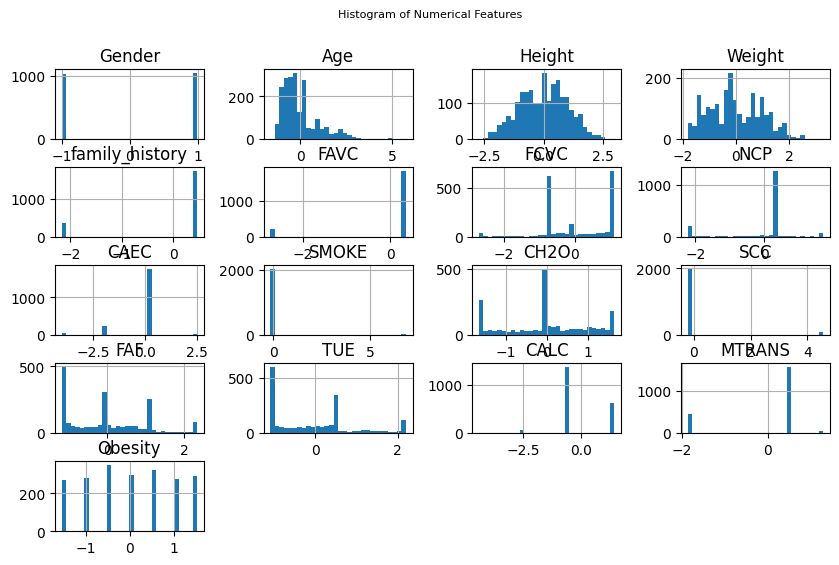

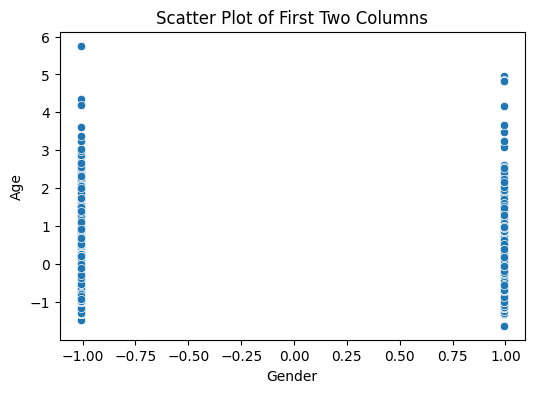

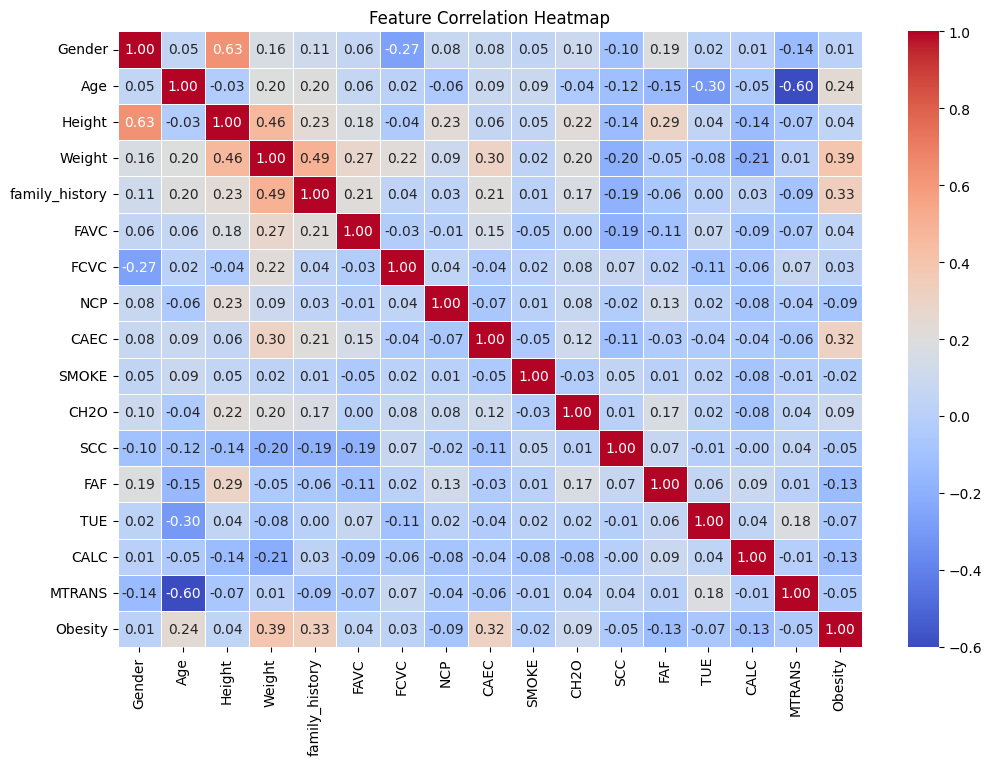

In [12]:
#  Data Visualizations
# Histogram
df.hist(figsize=(10, 6), bins=30)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.suptitle("Histogram of Numerical Features", fontsize=8)
plt.show()

# Scatter Plot
plt.figure(figsize=(6,4))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1])
plt.title("Scatter Plot of First Two Columns")
plt.show()

corr_matrix = df.corr()
# Display Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [13]:
# Check correlation of features with target
target_corr = corr_matrix["Obesity"].drop("Obesity", errors="ignore")

low_correlation_features = target_corr[abs(target_corr) < 0.05].index.tolist()
print("Features with very low correlation (could be dropped):", low_correlation_features)


Features with very low correlation (could be dropped): ['Gender', 'Height', 'FAVC', 'FCVC', 'SMOKE', 'MTRANS']


In [14]:
low_correlation_features=["Gender","Height","FAVC","FCVC","SMOKE","MTRANS"]
df=df.drop(columns=low_correlation_features)
print("Remaining columns:")
print(df.columns)

Remaining columns:
Index(['Age', 'Weight', 'family_history', 'NCP', 'CAEC', 'CH2O', 'SCC', 'FAF',
       'TUE', 'CALC', 'Obesity'],
      dtype='object')


In [15]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=["Obesity"])
y=df["Obesity"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression from Scratch
class LinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        self.coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X.dot(self.coefficients)

    def score(self, X, y):
        y_pred = self.predict(X)
        ss_total = np.sum((y - np.mean(y))**2)
        ss_residual = np.sum((y - y_pred)**2)
        return 1 - (ss_residual / ss_total)

    def rmse(self, X, y):
        y_pred = self.predict(X)
        mse = np.mean((y - y_pred) ** 2)
        return np.sqrt(mse)

    def plot_actual_vs_predicted(self, y_test, y_pred):
        plt.scatter(y_test, y_pred, label='Predicted vs Actual')
        plt.plot(y_test, y_test, color="red", label='Ideal Line')
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("Actual vs Predicted")
        plt.legend()
        plt.show()


Train RMSE: 0.8583414646946471
Test RMSE: 0.8708755884986076
Train R2 Score: 0.2634082247094707
Test R2 Score: 0.24092353687212598


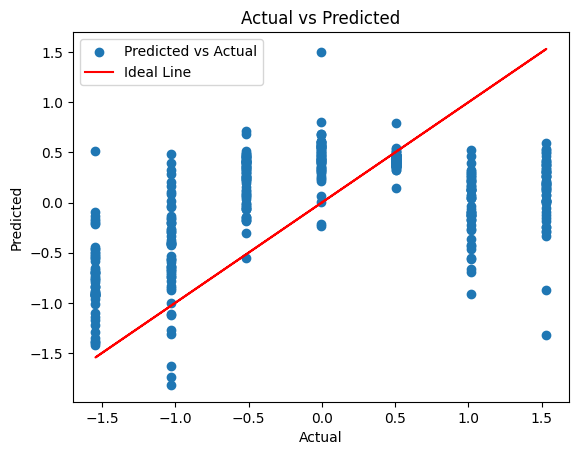

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
train_rmse = lr.rmse(X_train, y_train)
test_rmse = lr.rmse(X_test, y_test)

train_r2 = lr.score(X_train, y_train)
test_r2 = lr.score(X_test, y_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R2 Score:", train_r2)
print("Test R2 Score:", test_r2)s

lr.plot_actual_vs_predicted(y_test, y_pred_test)


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

X = df.drop(columns=['Obesity'])
y = df['Obesity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R2 Score: {train_r2}")
print(f"Test R2 Score: {test_r2}")


Train RMSE: 0.17972698123626338
Test RMSE: 0.46773700510861704
Train R2 Score: 0.9677749702496025
Test R2 Score: 0.7777556200233798


Random Forest Regressor performed better than linear regression.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

# 1. Cross-validation for Linear Regression
linear_model = LinearRegression()
linear_cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Linear Regression CV Scores (Negative MSE):", linear_cv_scores)
print("Linear Regression CV Scores (Positive MSE):", -linear_cv_scores)

rf_model = RandomForestRegressor(random_state=42)


param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

print("Best Hyperparameters for Random Forest Regressor:", grid_search_rf.best_params_)

# 2 Cross-validation for Random Forest using the best hyperparameters found
best_rf_model = grid_search_rf.best_estimator_
rf_cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Random Forest Regressor CV Scores (Negative MSE):", rf_cv_scores)
print("Random Forest Regressor CV Scores (Positive MSE):", -rf_cv_scores)  # Convert to positive MSE

# 4. Evaluate the best Random Forest model on the test set
y_pred_rf = best_rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Test MSE:", rf_mse)


Linear Regression CV Scores (Negative MSE): [-0.69760146 -0.74843782 -0.83113622 -0.80057161 -0.71077146]
Linear Regression CV Scores (Positive MSE): [0.69760146 0.74843782 0.83113622 0.80057161 0.71077146]
Best Hyperparameters for Random Forest Regressor: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Random Forest Regressor CV Scores (Negative MSE): [-0.25507515 -0.24799637 -0.21551185 -0.25144288 -0.22605487]
Random Forest Regressor CV Scores (Positive MSE): [0.25507515 0.24799637 0.21551185 0.25144288 0.22605487]
Random Forest Test MSE: 0.21642201893765323


In [24]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# 1. Feature Selection for Linear Regression using RFE
linear_model = LinearRegression()
selector_lr = RFE(linear_model, n_features_to_select=5)  # Select top 5 features
selector_lr.fit(X_train, y_train)

selected_features_lr = X_train.columns[selector_lr.support_]
print("Best Features for Linear Regression:", selected_features_lr)

# 2. Feature Selection for Random Forest using Feature Importances
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

importances_rf = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances_rf
})

sorted_feature_importance_rf = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Best Features for Random Forest Regressor:", sorted_feature_importance_rf['Feature'].head(5))


Best Features for Linear Regression: Index(['Age', 'Weight', 'family_history', 'NCP', 'CAEC'], dtype='object')
Best Features for Random Forest Regressor: 1    Weight
0       Age
7       FAF
5      CH2O
8       TUE
Name: Feature, dtype: object


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

best_params_rf = grid_search_rf.best_params_
best_features_rf = sorted_feature_importance_rf['Feature'].head(5).values
X_train_selected = X_train[best_features_rf]
X_test_selected = X_test[best_features_rf]

best_rf_model = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    random_state=42
)

best_rf_model.fit(X_train_selected, y_train)

y_pred_rf_final = best_rf_model.predict(X_test_selected)
final_rf_mse = mean_squared_error(y_test, y_pred_rf_final)
print("Final Random Forest Test MSE:", final_rf_mse)


Final Random Forest Test MSE: 0.2233482807326481
